# Capstone Project
### Applied Data Science Capstone by IBM/Coursera

## Introduction

The road transportation provides fast means of transportation. However, it is also subjected to the various kind of accidents. There are many factors and sources of an accident. Data on accident can provide the insights into these factors and sources and can help building better infrastructure or planning travelling schedule based on situational conditions.

The report would focus on infrastructural factors into accidents and help better infrastructure building and retrofitting of existing infrastructure along with keeping in mind the environmental & situational factors. Safety feature embedded on the time of building infrastructure have potential to reduce number of accidents and decreasing the severity of accidents. This report would help the architects and builder of road infrastructure to build safe road. 


## Data understanding

For the analysis, data should have infrastructural, environmental and situation factors for an accident. 
* Infrastructural factors would include type of junctions and type of turn. For example, existence of bland turn may increase the probability of accidents.
* Environmental factors include raining and lighting condition at the time of accident. For example, heavy rainfall may increase the probability of accidents, specially, if the road has slop and it is slippery.
* Situational factors involve factors like vehicle types and drivers’ condition. For example, speedy and driver under influence of drug or alcohol have high probability of meeting an accident.


#### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\Udaan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df_clr = df.drop(columns=['SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY', 'SDOTCOLNUM', 'SEVERITYCODE.1', 'SEVERITYDESC','LOCATION', 'STATUS', 'INCKEY', 'COLDETKEY', 'X', 'Y', 'INTKEY','EXCEPTRSNCODE', 'OBJECTID', 'REPORTNO','EXCEPTRSNDESC' ,'SPEEDING', 'PEDROWNOTGRNT', 'INATTENTIONIND', 'SDOT_COLCODE', 'ST_COLCODE'])

In [8]:
df_clr.head(1)

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,N


## Severity categories' inbalance in the data

**Value count of difference code of severity of accidents**

In [9]:
df_clr['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### Deleting the random rows of data where severity code is '1' to have balance in the different categories of severity.

In [10]:
df_clr.drop(df_clr.query('SEVERITYCODE == 1').sample(frac=.57).index, inplace=True)

#### value counts of different categories of code of severity 

In [11]:
df_clr['SEVERITYCODE'].value_counts()

1    58689
2    58188
Name: SEVERITYCODE, dtype: int64

### Data extraction - Bring out the day of week and time from accident datatime

In [12]:
df_clr['INCDATE'].head()

0    2013/03/27 00:00:00+00
4    2004/01/28 00:00:00+00
6    2008/12/09 00:00:00+00
7    2020/04/15 00:00:00+00
8    2006/06/15 00:00:00+00
Name: INCDATE, dtype: object

In [13]:
df_clr['INCDATE'] = df_clr['INCDATE'].str.split(" ", expand=True)[0]
df_clr['INCDATE'] = pd.to_datetime(df_clr['INCDATE'])
df_clr['DAYOFWEEK'] = df_clr['INCDATE'].dt.dayofweek
df_clr['INCDTTM'] = pd.to_datetime(df_clr['INCDTTM'])
df_clr['TIMEINHOURS'] = df_clr['INCDTTM'].dt.hour
df_clr.drop(columns=['INCDATE', 'INCDTTM'], inplace = True) 

df_clr.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,DAYOFWEEK,TIMEINHOURS
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N,2,14
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N,2,8
6,1,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N,1,0
7,2,Intersection,Cycles,3,0,1,1,At Intersection (intersection related),N,Clear,Dry,Daylight,N,2,17
8,1,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),0,Clear,Dry,Daylight,N,3,13


In [14]:
df_clr['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              49759
At Intersection (intersection related)               42461
Mid-Block (but intersection related)                 13958
Driveway Junction                                     6377
At Intersection (but not related to intersection)     1258
Ramp Junction                                           97
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [15]:
df_clr.replace({'JUNCTIONTYPE': {'Mid-Block (not related to intersection)': 'Mid-Block_not_related_to_intersection', 
                                   'At Intersection (intersection related)': 'At_Intersection',
                                   'Mid-Block (but intersection related)': 'Mid-Block_but_intersection_related)',
                                   'Driveway Junction': 'Driveway_Junction',
                                   'At Intersection (but not related to intersection)': 'At_Intersection_but_not_related_to_intersection)',
                                   'Ramp Junction': 'Ramp_Junction',
                                   'Unknown' : 'JunctionTypeUnknown'
                                  }}, inplace=True)

In [16]:
df_clr['COLLISIONTYPE'].value_counts()

Rear Ended    23015
Angles        22627
Parked Car    22309
Other         13563
Sideswipe      9541
Left Turn      8934
Pedestrian     6230
Cycles         5021
Right Turn     1620
Head On        1361
Name: COLLISIONTYPE, dtype: int64

In [17]:
df_clr.replace({'COLLISIONTYPE': {'Rear Ended':'Rear_Ended',
                                    'Parked Car':'Parked_Car',
                                    'Other':'CollisionType_other',
                                    'Left Turn':'Left_Turn',
                                    'Right Turn':'Right_Turn',
                                    'Head On':'Head_On'
                                    
                                  }}, inplace=True)

In [18]:
df_clr['LIGHTCOND'].value_counts()

Daylight                    71987
Dark - Street Lights On     29085
Unknown                      6162
Dusk                         3650
Dawn                         1529
Dark - No Street Lights       846
Dark - Street Lights Off      693
Other                         121
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [19]:
df_clr.replace({'LIGHTCOND': {'Dark - Street Lights On':'Dark-Street_Lights_On',
                              'Other':'LIGHT_Other',
                              'Unknown':'LIGHT_Unknown',
                              'Dark - No Street Lights':'Dark-No_Street_Lights',
                              'Dark - Street Lights Off':'Dark-Street_Lights_Off',
                                'Dark - Unknown Lighting':'Dark-Unknown_Lighting'
                                  }}, inplace=True)

In [20]:
df_clr['ROADCOND'].value_counts()

Dry               76397
Wet               29406
Unknown            6924
Ice                 665
Snow/Slush          531
Other                88
Standing Water       66
Sand/Mud/Dirt        53
Oil                  40
Name: ROADCOND, dtype: int64

In [21]:
df_clr.replace({'ROADCOND': {'Unknown':'ROADCOND_Unknown',
                              'Other':'ROADCOND_Other',
                              'Standing Water':'Standing_Water'
                                  }}, inplace=True)

In [22]:
df_clr['WEATHER'].value_counts()

Clear                       68238
Raining                     20632
Overcast                    16864
Unknown                      6968
Snowing                       488
Other                         451
Fog/Smog/Smoke                352
Sleet/Hail/Freezing Rain       67
Blowing Sand/Dirt              38
Severe Crosswind               16
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [23]:
df_clr.replace({'WEATHER': {'Unknown':'WEATHER_Unknown',
                              'Other':'WEATHER_Other',
                              'Severe Crosswind':'Severe_Crosswind',
                              'Partly Cloudy':'Partly_Cloudy',
                              'Blowing Sand/Dirt':'Blowing_Sand/Dirt'
                                  }}, inplace=True)

In [24]:
df_clr['HITPARKEDCAR'] = df_clr['HITPARKEDCAR'].replace(to_replace = ['Y','N'],value = ['1','0'])

In [25]:
df_clr['UNDERINFL'] = df_clr['UNDERINFL'].replace(to_replace = ['Y','N'],value = ['1','0'])

In [26]:
df_clr.dropna(inplace =True)

In [27]:
df_clr.shape

(110963, 15)

### Visual analyse of the accident data

##### 1. Lighting condition: 
From the plot, it is clear that lighting condition don't have much influnce in determing the type of severity of the accident. 

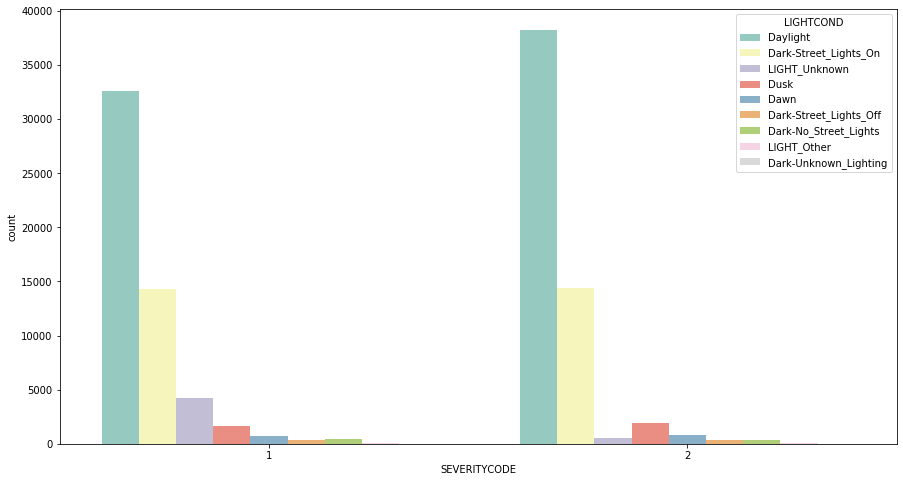

In [28]:
plt.figure(figsize=(15,8))
sns.countplot( hue='LIGHTCOND', x ='SEVERITYCODE', data=df_clr, palette="Set3")

##### 2. Road condition: 
From the plot, it is clear that road condition don't have much influnce in determing the type of severity of the accident. The wet road conditions almost have similar number of accidents for both the severity. Further, Dry road conditions contribute to more number of accident as against the wet road conditions. It may be due the fact that dry condition is more prevalent than wet road condition. Since we don't have time proportion of dry to wet condition, we can't make a prediction that wet condition have more probability than dry condition.

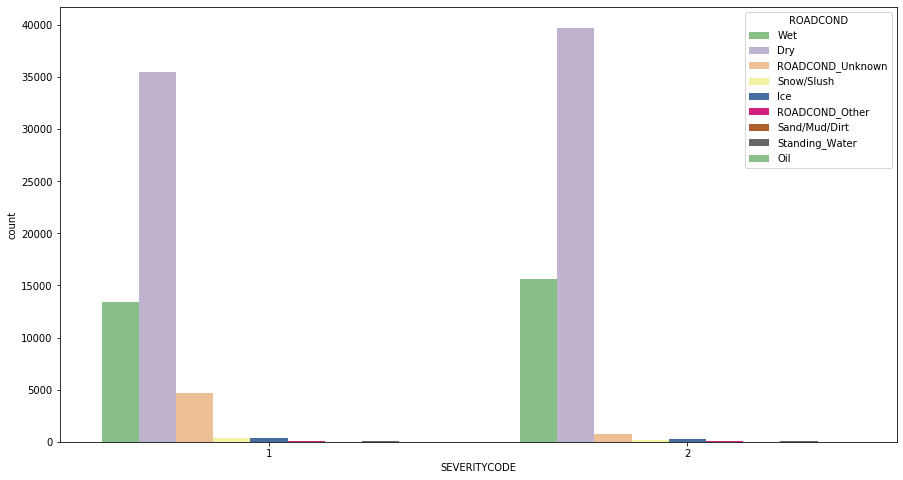

In [29]:
plt.figure(figsize=(15,8))
sns.countplot( hue='ROADCOND', x ='SEVERITYCODE', data=df_clr, palette='Accent')

#### 3. Weather condition:
From the plot, it is clear that weather condition don't have much influnce in determing the type of severity of the accident. Clear weather have marginally more number of Severity-2 accidents. Further, raining don't seems to have influence on determining the severity of accidents.

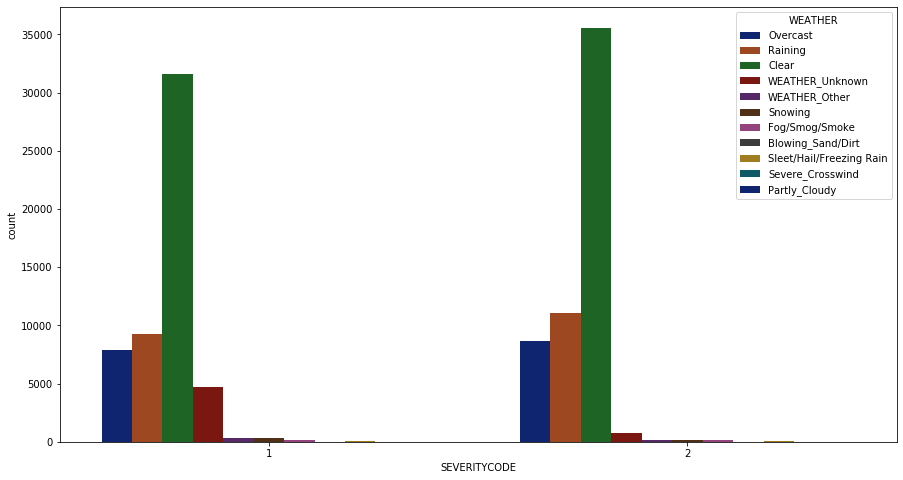

In [30]:
plt.figure(figsize=(15,8))
sns.countplot( hue='WEATHER', x ='SEVERITYCODE', data=df_clr, palette="dark")

##### 4. Junction Type: 
From the plot, it is clear that junction type have influence on determining the severity of accidents. At intersection junction, there are more severity-2 accident than severity-1 accidents. Similirly, in mid-block junction, there are more severity-1 accident than severity-2 accidents.

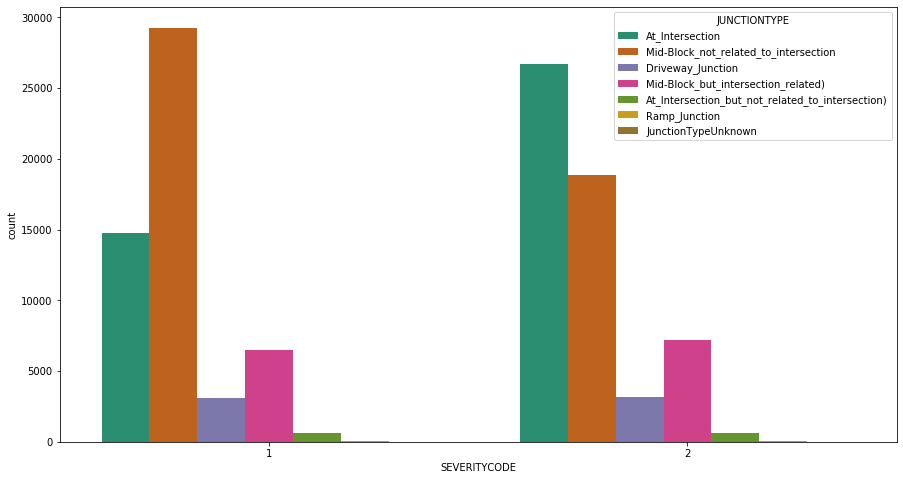

In [31]:
plt.figure(figsize=(15,8))
sns.countplot( hue='JUNCTIONTYPE', x ='SEVERITYCODE', data=df_clr, palette="Dark2")

##### 5. Collision Type: 
From the plot, it is clear that collision type have some relationship with type of severity of accident. As most of parked car collision have severity-1 accidents.

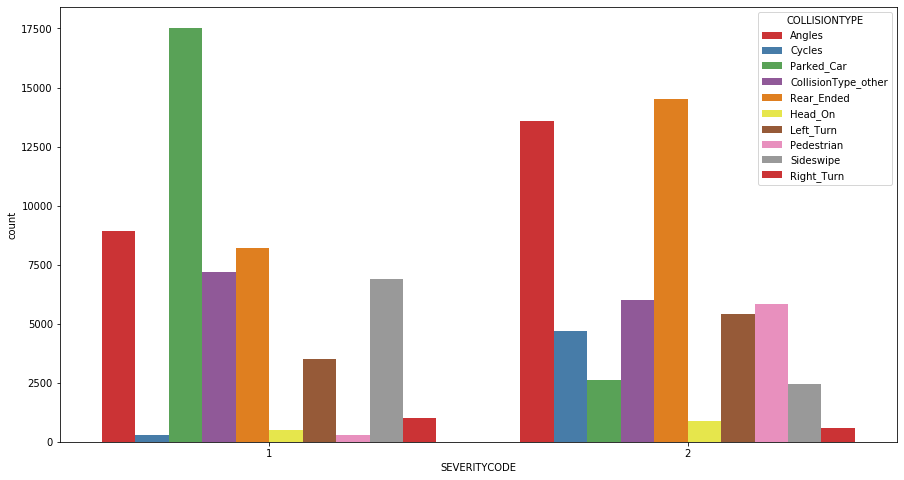

In [32]:
plt.figure(figsize=(15,8))
sns.countplot( hue='COLLISIONTYPE', x ='SEVERITYCODE', data=df_clr, palette="Set1")

##### 6. Address Type: 
From the plot, it is clear that Block have more of severity-1 type accidents.

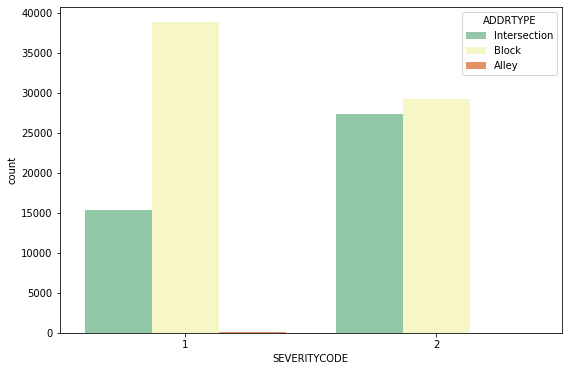

In [33]:
plt.figure(figsize=(9,6))
sns.countplot( hue='ADDRTYPE', x ='SEVERITYCODE', data=df_clr, palette="Spectral_r")

##### 7. Day of week:
From the plot, it seems that day of the week don't have any relationship with severity of accident. However, it is clear from the plot that the number of accident is highest on fridays and lowest on sundays.

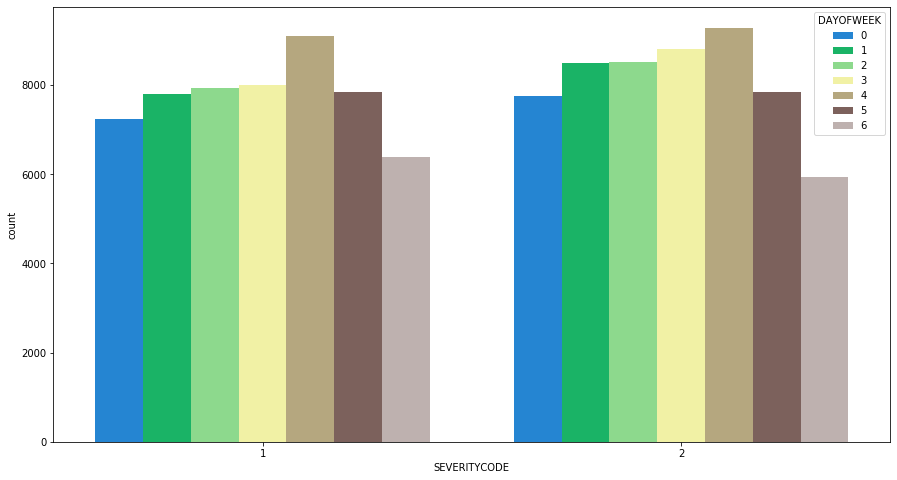

In [34]:
plt.figure(figsize=(15,8))
sns.countplot( hue='DAYOFWEEK', x ='SEVERITYCODE', data=df_clr, palette="terrain")

##### 8. Hours of accidents
There are highest number of accident between 5PM and 6PM.

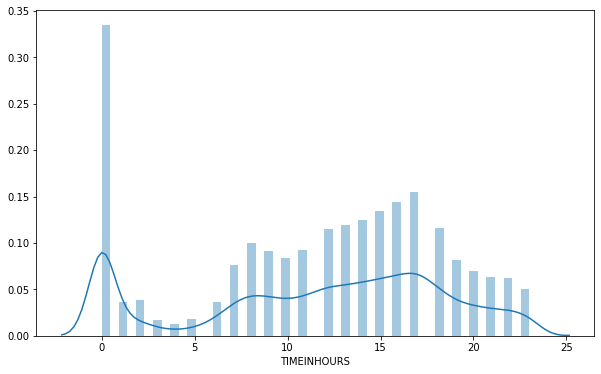

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df_clr['TIMEINHOURS'])

##### 9. Under the influence of drug or alcohol
There seems to be no relationship between influence of drug or alcohol and the severity of the accidents.

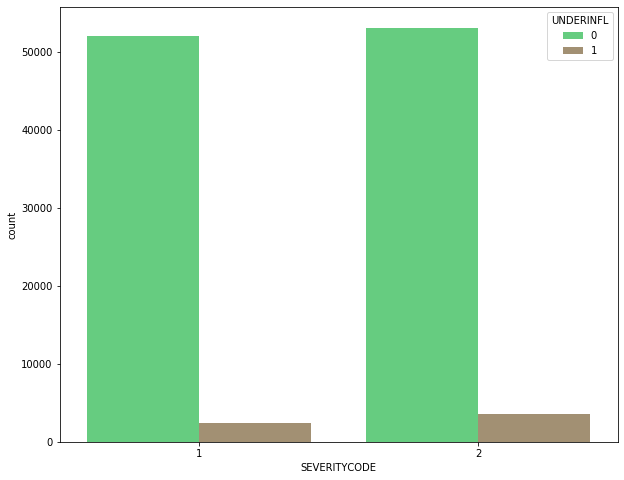

In [36]:
plt.figure(figsize=(10,8))
sns.countplot( hue='UNDERINFL', x ='SEVERITYCODE', data=df_clr, palette = 'terrain')

### Dealing with categorical features- creating dummy variables 

In [37]:
addressType = pd.get_dummies(df_clr['ADDRTYPE'], drop_first=True)
df_clr.drop(['ADDRTYPE'], axis=1, inplace =True)
df_clr = pd.concat([df_clr, addressType], axis=1)

In [38]:
Collision = pd.get_dummies(df_clr['COLLISIONTYPE'], drop_first=True)
df_clr.drop(['COLLISIONTYPE'], axis=1, inplace =True)

JUNCTION = pd.get_dummies(df_clr['JUNCTIONTYPE'], drop_first=True)
df_clr.drop(['JUNCTIONTYPE'], axis=1, inplace =True)

WEATHER = pd.get_dummies(df_clr['WEATHER'], drop_first=True)
df_clr.drop(['WEATHER'], axis=1, inplace =True)

ROAD = pd.get_dummies(df_clr['ROADCOND'], drop_first=True)
df_clr.drop(['ROADCOND'], axis=1, inplace =True)

LIGHT = pd.get_dummies(df_clr['LIGHTCOND'], drop_first=True)
df_clr.drop(['LIGHTCOND'], axis=1, inplace =True)

df_clr = pd.concat([df_clr, Collision, JUNCTION, WEATHER, ROAD, LIGHT], axis=1)

### Feature selection

In [39]:
X = df_clr.drop('SEVERITYCODE', axis=1)
X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,DAYOFWEEK,TIMEINHOURS,Block,Intersection,...,Standing_Water,Wet,Dark-Street_Lights_Off,Dark-Street_Lights_On,Dark-Unknown_Lighting,Dawn,Daylight,Dusk,LIGHT_Other,LIGHT_Unknown
0,2,0,0,2,0,0,2,14,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2,0,0,2,0,0,2,8,0,1,...,0,1,0,0,0,0,1,0,0,0
6,2,0,0,2,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7,3,0,1,1,0,0,2,17,0,1,...,0,0,0,0,0,0,1,0,0,0
8,2,0,0,2,0,0,3,13,1,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
y = df_clr['SEVERITYCODE']
y.head()

0    2
4    2
6    1
7    2
8    1
Name: SEVERITYCODE, dtype: int64

_Preprocessing feature data by standardscaler function_

In [41]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77674, 51) (77674,)
Test set: (33289, 51) (33289,)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [44]:
y_pred = knn.predict(X_test)

In [45]:
y_pred

array([2, 1, 1, ..., 2, 1, 1], dtype=int64)

In [46]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.7517573448000618
Test set Accuracy:  0.6493736669770795


In [ ]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbor (K)')
plt.tight_layout()
plt.show()
print( "The best 'KNN' accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [ ]:
y_predLR = LR.predict(X_test)
y_predLR

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predLR))

In [ ]:
from sklearn import svm
SVM_ = svm.SVC(kernel='rbf')
SVM_.fit(X_train, y_train)

In [ ]:
pred_svm = SVM_.predict(X_test)
pred_svm[0:5]

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM_.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred_svm))